In [4]:
from mrjob.job import MRJob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns

df = pd.read_csv('googleplaystore.csv')

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
from collections import defaultdict
from functools import reduce
import pandas as pd

class GooglePlayStoreReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def mapper(self, row):
        category = row[1]['Category']
        return category, 1

    def reducer(self, acc, category):
        acc[category] += 1
        return acc

    def run(self):
        mapped = map(self.mapper, self.df.iterrows())
        reduced = reduce(self.reducer, mapped, defaultdict(int))
        for category, count in reduced.items():
            print(f'{category}: {count}')

if __name__ == '__main__':
    report = GooglePlayStoreReport('googleplaystore.csv')
    report.run()

('ART_AND_DESIGN', 1): 65
('AUTO_AND_VEHICLES', 1): 85
('BEAUTY', 1): 53
('BOOKS_AND_REFERENCE', 1): 231
('BUSINESS', 1): 460
('COMICS', 1): 60
('COMMUNICATION', 1): 387
('DATING', 1): 234
('EDUCATION', 1): 156
('ENTERTAINMENT', 1): 149
('EVENTS', 1): 64
('FINANCE', 1): 366
('FOOD_AND_DRINK', 1): 127
('HEALTH_AND_FITNESS', 1): 341
('HOUSE_AND_HOME', 1): 88
('LIBRARIES_AND_DEMO', 1): 85
('LIFESTYLE', 1): 382
('GAME', 1): 1144
('FAMILY', 1): 1972
('MEDICAL', 1): 463
('SOCIAL', 1): 295
('SHOPPING', 1): 260
('PHOTOGRAPHY', 1): 335
('SPORTS', 1): 384
('TRAVEL_AND_LOCAL', 1): 258
('TOOLS', 1): 843
('PERSONALIZATION', 1): 392
('PRODUCTIVITY', 1): 424
('PARENTING', 1): 60
('WEATHER', 1): 82
('VIDEO_PLAYERS', 1): 175
('NEWS_AND_MAGAZINES', 1): 283
('MAPS_AND_NAVIGATION', 1): 137
('1.9', 1): 1


In [6]:
from collections import defaultdict
from functools import reduce
import pandas as pd

class GooglePlayStoreReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def mapper(self, row):
        category = row[1]['Category']
        rating = row[1]['Rating']
        return category, rating

    def reducer(self, acc, category_rating):
        category, rating = category_rating
        acc[category].append(rating)
        return acc

    def calculate_average_rating(self, category_ratings):
        category, ratings = category_ratings
        average_rating = sum(ratings) / len(ratings)
        return category, average_rating

    def preprocess_data(self):
        self.df.dropna(subset=['Rating'], inplace=True)

    def run_average_rating_report(self):
        self.preprocess_data()
        mapped = map(self.mapper, self.df.iterrows())
        reduced = reduce(self.reducer, mapped, defaultdict(list))
        average_ratings = map(self.calculate_average_rating, reduced.items())
        result = {}
        for category, rating in average_ratings:
            result[category] = rating
        return result

if __name__ == '__main__':
    report = GooglePlayStoreReport('googleplaystore.csv')
    print("\nAverage Rating Report:")
    average_ratings = report.run_average_rating_report()
    for category, rating in average_ratings.items():
        print(f'{category}: {rating:.2f}')


Average Rating Report:
ART_AND_DESIGN: 4.36
AUTO_AND_VEHICLES: 4.19
BEAUTY: 4.28
BOOKS_AND_REFERENCE: 4.35
BUSINESS: 4.12
COMICS: 4.16
COMMUNICATION: 4.16
DATING: 3.97
EDUCATION: 4.39
ENTERTAINMENT: 4.13
EVENTS: 4.44
FINANCE: 4.13
FOOD_AND_DRINK: 4.17
HEALTH_AND_FITNESS: 4.28
HOUSE_AND_HOME: 4.20
LIBRARIES_AND_DEMO: 4.18
LIFESTYLE: 4.09
GAME: 4.29
FAMILY: 4.19
MEDICAL: 4.19
SOCIAL: 4.26
SHOPPING: 4.26
PHOTOGRAPHY: 4.19
SPORTS: 4.22
TRAVEL_AND_LOCAL: 4.11
TOOLS: 4.05
PERSONALIZATION: 4.34
PRODUCTIVITY: 4.21
PARENTING: 4.30
WEATHER: 4.24
VIDEO_PLAYERS: 4.06
NEWS_AND_MAGAZINES: 4.13
MAPS_AND_NAVIGATION: 4.05
1.9: 19.00


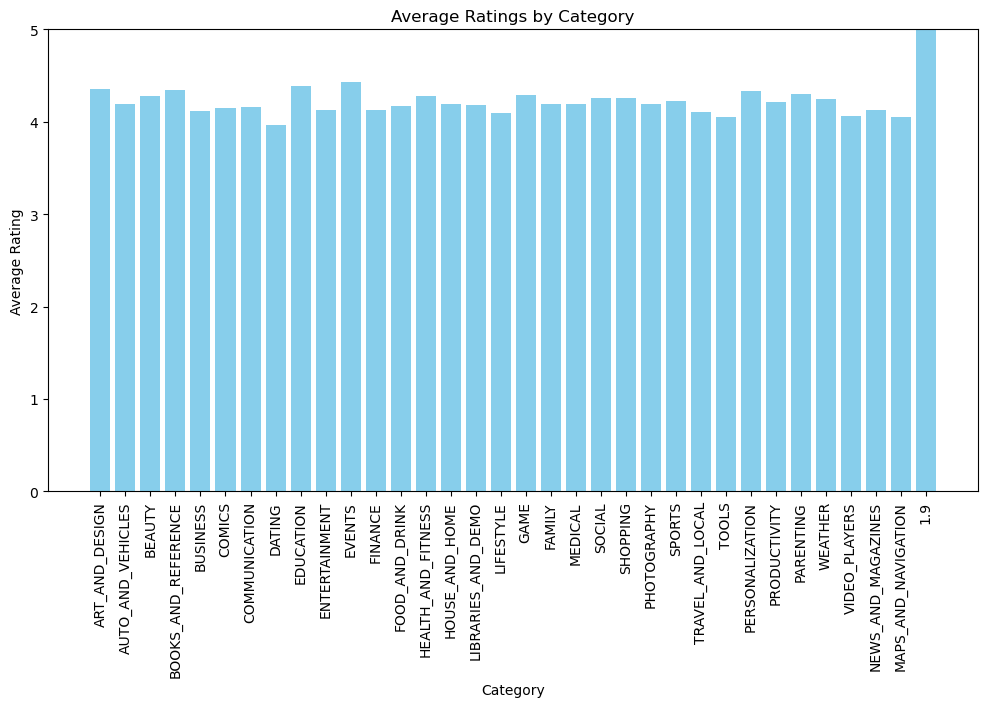

In [7]:
import matplotlib.pyplot as plt

report = GooglePlayStoreReport('googleplaystore.csv')
average_ratings = report.run_average_rating_report()

# Plotting the graph
categories = list(average_ratings.keys())
ratings = list(average_ratings.values())

plt.figure(figsize=(12, 6))
plt.bar(categories, ratings, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Category')
plt.xticks(rotation=90)
plt.ylim(0, 5)  # Set y-axis limits from 0 to 5
plt.show()

In [8]:
from collections import defaultdict
from functools import reduce
import pandas as pd

class GooglePlayStoreReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def preprocess_data(self):
        self.df.dropna(subset=['Price'], inplace=True)

    def mapper(self, row):
        category = row[1]['Category']
        price = row[1]['Price']
        if price.startswith('$'):
            price = float(price[1:])
        else:
            price = 0
        return category, price

    def reducer(self, acc, category_price):
        category, price = category_price
        acc[category]['total'] += price
        if price > acc[category]['most_expensive']:
            acc[category]['most_expensive'] = price
        acc[category]['count'] += 1
        return acc

    def calculate_statistics(self, category_data):
        category = category_data[0]
        stats = category_data[1]
        average_price = stats['total'] / stats['count']
        most_expensive = stats['most_expensive']
        return category, average_price, most_expensive

    def run_report(self):
        self.preprocess_data()
        initial_accumulator = defaultdict(lambda: {'total': 0, 'most_expensive': 0, 'count': 0})
        reduced = reduce(self.reducer, map(self.mapper, self.df.iterrows()), initial_accumulator)
        statistics = map(self.calculate_statistics, reduced.items())
        print("Category | Average Price | Most Expensive Price")
        for category, average_price, most_expensive in statistics:
            print(f"{category} | ${average_price:.2f} | ${most_expensive:.2f}")

if __name__ == '__main__':
    report = GooglePlayStoreReport('googleplaystore.csv')
    print("\nGoogle Play Store Statistics Report:")
    report.run_report()


Google Play Store Statistics Report:
Category | Average Price | Most Expensive Price
ART_AND_DESIGN | $0.09 | $1.99
AUTO_AND_VEHICLES | $0.16 | $9.99
BEAUTY | $0.00 | $0.00
BOOKS_AND_REFERENCE | $0.52 | $6.49
BUSINESS | $0.40 | $89.99
COMICS | $0.00 | $0.00
COMMUNICATION | $0.21 | $19.99
DATING | $0.13 | $7.99
EDUCATION | $0.12 | $5.99
ENTERTAINMENT | $0.05 | $4.99
EVENTS | $1.72 | $109.99
FINANCE | $7.93 | $399.99
FOOD_AND_DRINK | $0.07 | $4.99
HEALTH_AND_FITNESS | $0.20 | $9.99
HOUSE_AND_HOME | $0.00 | $0.00
LIBRARIES_AND_DEMO | $0.01 | $0.99
LIFESTYLE | $6.18 | $400.00
GAME | $0.25 | $17.99
FAMILY | $1.23 | $399.99
MEDICAL | $3.11 | $200.00
SOCIAL | $0.05 | $13.99
SHOPPING | $0.02 | $2.99
PHOTOGRAPHY | $0.40 | $29.99
SPORTS | $0.26 | $29.99
TRAVEL_AND_LOCAL | $0.19 | $8.99
TOOLS | $0.32 | $25.99
PERSONALIZATION | $0.39 | $9.99
PRODUCTIVITY | $0.59 | $154.99
PARENTING | $0.16 | $4.99
WEATHER | $0.40 | $6.99
VIDEO_PLAYERS | $0.06 | $5.99
NEWS_AND_MAGAZINES | $0.01 | $2.99
MAPS_AND_NA

In [9]:
import pandas as pd

class GooglePlayStoreReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def preprocess_data(self):
        self.df.dropna(subset=['Price'], inplace=True)

    def count_free_apps(self):
        free_apps_count = self.df[self.df['Price'] == '0'].groupby('Category').size()
        return free_apps_count

    def count_total_apps(self):
        total_apps_count = self.df.groupby('Category').size()
        return total_apps_count

    def run_free_apps_report(self):
        self.preprocess_data()
        free_apps_count = self.count_free_apps()
        total_apps_count = self.count_total_apps()

        print("Number of Free Apps and Total Apps in Each Category:")
        for category in free_apps_count.index:
            free_count = free_apps_count.get(category, 0)
            total_count = total_apps_count.get(category, 0)
            print(f"{category}: {free_count} free apps out of {total_count} total apps")

if __name__ == '__main__':
    report = GooglePlayStoreReport('googleplaystore.csv')
    report.run_free_apps_report()

Number of Free Apps and Total Apps in Each Category:
ART_AND_DESIGN: 62 free apps out of 65 total apps
AUTO_AND_VEHICLES: 82 free apps out of 85 total apps
BEAUTY: 53 free apps out of 53 total apps
BOOKS_AND_REFERENCE: 203 free apps out of 231 total apps
BUSINESS: 446 free apps out of 460 total apps
COMICS: 60 free apps out of 60 total apps
COMMUNICATION: 360 free apps out of 387 total apps
DATING: 227 free apps out of 234 total apps
EDUCATION: 152 free apps out of 156 total apps
ENTERTAINMENT: 147 free apps out of 149 total apps
EVENTS: 63 free apps out of 64 total apps
FAMILY: 1781 free apps out of 1972 total apps
FINANCE: 349 free apps out of 366 total apps
FOOD_AND_DRINK: 125 free apps out of 127 total apps
GAME: 1061 free apps out of 1144 total apps
HEALTH_AND_FITNESS: 325 free apps out of 341 total apps
HOUSE_AND_HOME: 88 free apps out of 88 total apps
LIBRARIES_AND_DEMO: 84 free apps out of 85 total apps
LIFESTYLE: 363 free apps out of 382 total apps
MAPS_AND_NAVIGATION: 132 fre

In [10]:
from collections import defaultdict
from functools import reduce
import pandas as pd

class GooglePlayStoreReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def preprocess_data(self):
        self.df.dropna(subset=['Price'], inplace=True)

    def mapper(self, row):
        category = row[1]['Category']
        price = row[1]['Price']
        if price.startswith('$'):
            price = float(price[1:])
        else:
            price = 0
        return category, price

    def reducer(self, acc, category_price):
        category, price = category_price
        acc[category]['total'] += price
        if price > acc[category]['most_expensive']:
            acc[category]['most_expensive'] = price
        acc[category]['count'] += 1
        return acc

    def calculate_statistics(self, category_data):
        category = category_data[0]
        stats = category_data[1]
        average_price = stats['total'] / stats['count']
        most_expensive = stats['most_expensive']
        return category, average_price, most_expensive

    def run_report(self):
        self.preprocess_data()
        initial_accumulator = defaultdict(lambda: {'total': 0, 'most_expensive': 0, 'count': 0})
        reduced = reduce(self.reducer, map(self.mapper, self.df.iterrows()), initial_accumulator)
        statistics = map(self.calculate_statistics, reduced.items())
        print("Category | Average Price | Most Expensive Price")
        for category, average_price, most_expensive in statistics:
            print(f"{category} | ${average_price:.2f} | ${most_expensive:.2f}")

if __name__ == '__main__':
    report = GooglePlayStoreReport('googleplaystore.csv')
    print("\nGoogle Play Store Statistics Report:")
    report.run_report()


Google Play Store Statistics Report:
Category | Average Price | Most Expensive Price
ART_AND_DESIGN | $0.09 | $1.99
AUTO_AND_VEHICLES | $0.16 | $9.99
BEAUTY | $0.00 | $0.00
BOOKS_AND_REFERENCE | $0.52 | $6.49
BUSINESS | $0.40 | $89.99
COMICS | $0.00 | $0.00
COMMUNICATION | $0.21 | $19.99
DATING | $0.13 | $7.99
EDUCATION | $0.12 | $5.99
ENTERTAINMENT | $0.05 | $4.99
EVENTS | $1.72 | $109.99
FINANCE | $7.93 | $399.99
FOOD_AND_DRINK | $0.07 | $4.99
HEALTH_AND_FITNESS | $0.20 | $9.99
HOUSE_AND_HOME | $0.00 | $0.00
LIBRARIES_AND_DEMO | $0.01 | $0.99
LIFESTYLE | $6.18 | $400.00
GAME | $0.25 | $17.99
FAMILY | $1.23 | $399.99
MEDICAL | $3.11 | $200.00
SOCIAL | $0.05 | $13.99
SHOPPING | $0.02 | $2.99
PHOTOGRAPHY | $0.40 | $29.99
SPORTS | $0.26 | $29.99
TRAVEL_AND_LOCAL | $0.19 | $8.99
TOOLS | $0.32 | $25.99
PERSONALIZATION | $0.39 | $9.99
PRODUCTIVITY | $0.59 | $154.99
PARENTING | $0.16 | $4.99
WEATHER | $0.40 | $6.99
VIDEO_PLAYERS | $0.06 | $5.99
NEWS_AND_MAGAZINES | $0.01 | $2.99
MAPS_AND_NA

In [11]:
from collections import defaultdict
from functools import reduce
import pandas as pd

class GooglePlayStoreReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def mapper(self, row):
        category = row[1]['Category']
        app = row[1]['App']
        reviews_str = row[1]['Reviews']
        reviews = int(float(reviews_str.replace('M', '')) * 1000000) if 'M' in reviews_str else int(reviews_str)
        # print(f'Reviews String for {app}: {reviews}')
        
        installs_str = row[1]['Installs']
        # print(f'Installs String for {app}: {installs_str}')
        installs_str = installs_str.replace('+', '').replace(',', '')
        installs = int(installs_str) if installs_str.isdigit() else -1
        
        # print(f'Installs String for {app}: {installs_str}')
        return category, app, reviews, installs

    def reducer(self, acc, app_data):
        category, app, reviews, installs = app_data
        acc[category]['Reviews'] += reviews
        acc[category]['Installs'] += installs
        return acc

    def calculate_review_install_ratio(self, category_data):
        category, data = category_data
        total_reviews = data['Reviews']
        total_installs = data['Installs']
        ratio = total_reviews / total_installs
        return category, ratio

    def preprocess_data(self):
        self.df.dropna(subset=['Reviews', 'Installs', 'Category'], inplace=True)

    def run_report(self):
        self.preprocess_data()
        mapped = map(self.mapper, self.df.iterrows())
        reduced = reduce(self.reducer, mapped, defaultdict(lambda: {'Reviews': 0, 'Installs': 0}))
        ratios = map(self.calculate_review_install_ratio, reduced.items())

        # exclude 1.9 category
        ratios = filter(lambda x: x[0] != '1.9', ratios)
        
        sorted_ratios = sorted(ratios, key=lambda x: x[1], reverse=True)
        for category, ratio in sorted_ratios:
            ratio_percentage = ratio * 100
            print(f'{category}: {ratio:.6f}, {ratio_percentage:.2f}%')

if __name__ == '__main__':
    report = GooglePlayStoreReport('googleplaystore.csv')
    print("\nAverage Reviews to Installs Ratio Report by Category:")
    report.run_report()


Average Reviews to Installs Ratio Report by Category:
COMICS: 0.060323, 6.03%
EDUCATION: 0.045437, 4.54%
GAME: 0.045187, 4.52%
SOCIAL: 0.044154, 4.42%
MAPS_AND_NAVIGATION: 0.042331, 4.23%
SPORTS: 0.040447, 4.04%
FAMILY: 0.039990, 4.00%
PERSONALIZATION: 0.038420, 3.84%
SHOPPING: 0.035421, 3.54%
WEATHER: 0.034275, 3.43%
FOOD_AND_DRINK: 0.032433, 3.24%
PARENTING: 0.030403, 3.04%
MEDICAL: 0.029779, 2.98%
DATING: 0.027586, 2.76%
COMMUNICATION: 0.024978, 2.50%
LIFESTYLE: 0.023962, 2.40%
HEALTH_AND_FITNESS: 0.023937, 2.39%
TOOLS: 0.023853, 2.39%
HOUSE_AND_HOME: 0.023569, 2.36%
AUTO_AND_VEHICLES: 0.021902, 2.19%
PHOTOGRAPHY: 0.021165, 2.12%
ENTERTAINMENT: 0.020626, 2.06%
FINANCE: 0.020020, 2.00%
VIDEO_PLAYERS: 0.017740, 1.77%
LIBRARIES_AND_DEMO: 0.016463, 1.65%
BEAUTY: 0.014569, 1.46%
BUSINESS: 0.013928, 1.39%
ART_AND_DESIGN: 0.013789, 1.38%
BOOKS_AND_REFERENCE: 0.011428, 1.14%
EVENTS: 0.010081, 1.01%
TRAVEL_AND_LOCAL: 0.009116, 0.91%
PRODUCTIVITY: 0.008050, 0.80%
NEWS_AND_MAGAZINES: 0.007257

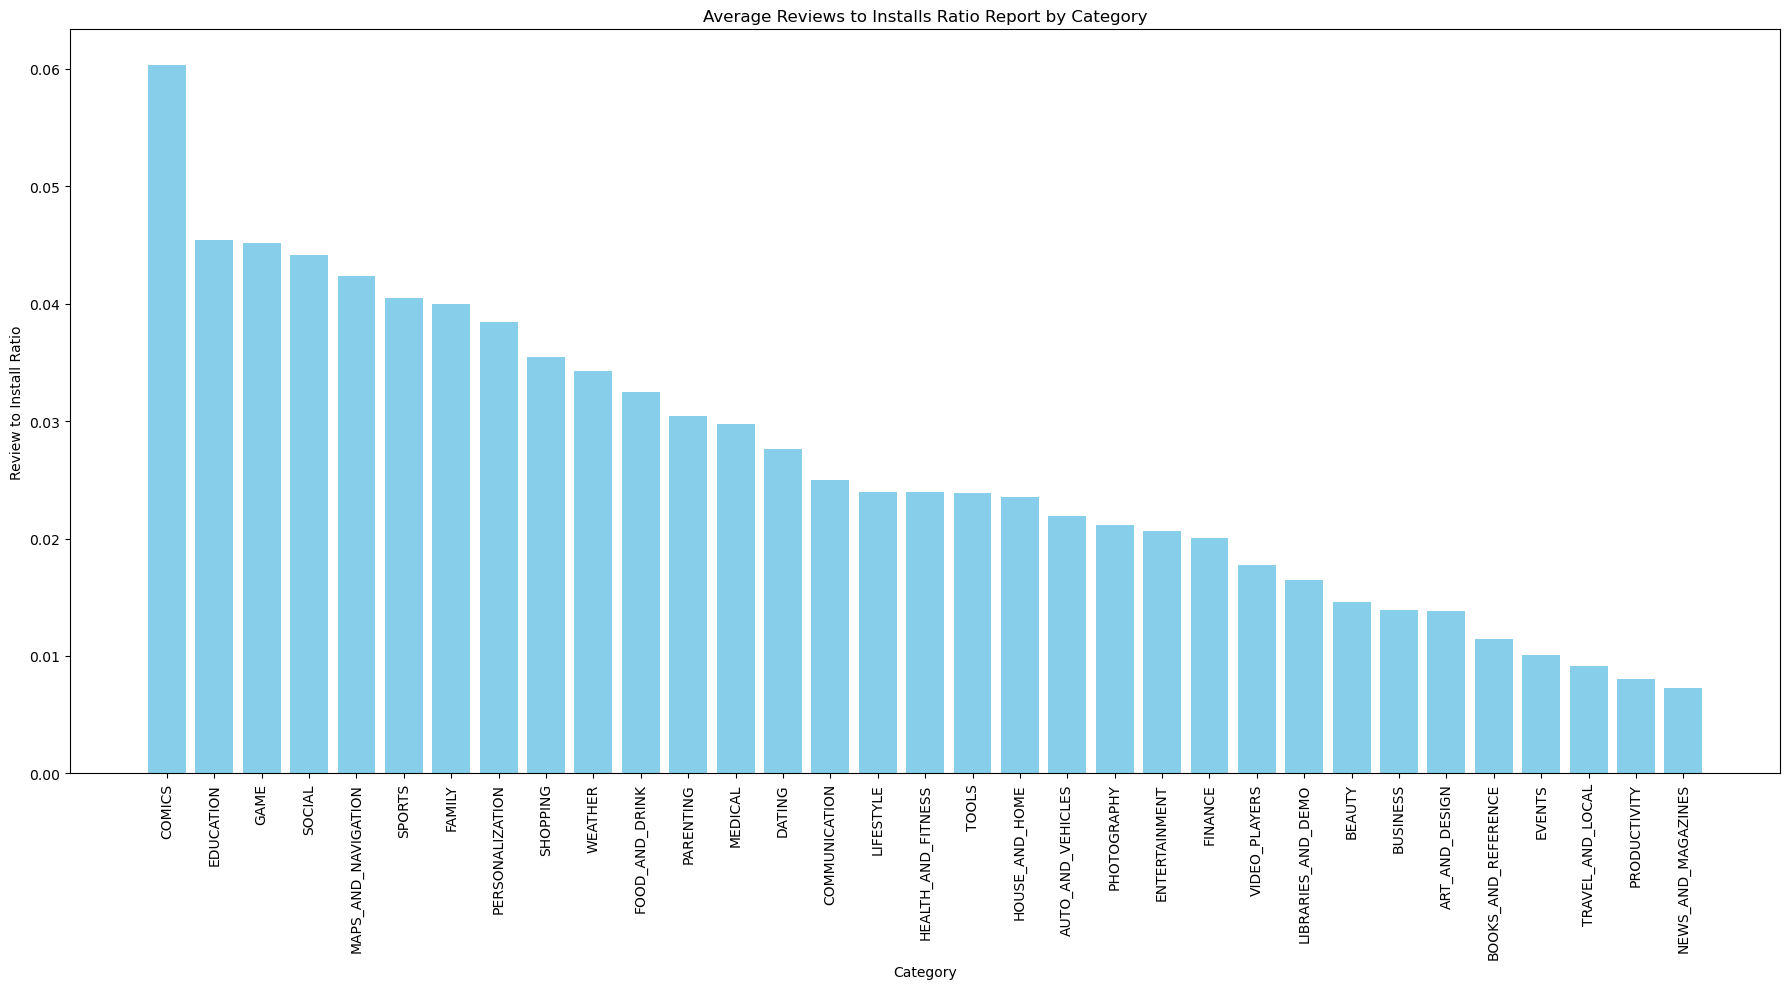

In [12]:
import matplotlib.pyplot as plt

categories = [
    "COMICS", "EDUCATION", "GAME", "SOCIAL", "MAPS_AND_NAVIGATION",
    "SPORTS", "FAMILY", "PERSONALIZATION", "SHOPPING", "WEATHER",
    "FOOD_AND_DRINK", "PARENTING", "MEDICAL", "DATING", "COMMUNICATION",
    "LIFESTYLE", "HEALTH_AND_FITNESS", "TOOLS", "HOUSE_AND_HOME", "AUTO_AND_VEHICLES",
    "PHOTOGRAPHY", "ENTERTAINMENT", "FINANCE", "VIDEO_PLAYERS", "LIBRARIES_AND_DEMO",
    "BEAUTY", "BUSINESS", "ART_AND_DESIGN", "BOOKS_AND_REFERENCE", "EVENTS",
    "TRAVEL_AND_LOCAL", "PRODUCTIVITY", "NEWS_AND_MAGAZINES"
]

ratios = [
    0.060323, 0.045437, 0.045187, 0.044154, 0.042331,
    0.040447, 0.039990, 0.038420, 0.035421, 0.034275,
    0.032433, 0.030403, 0.029779, 0.027586, 0.024978,
    0.023962, 0.023937, 0.023853, 0.023569, 0.021902,
    0.021165, 0.020626, 0.020020, 0.017740, 0.016463,
    0.014569, 0.013928, 0.013789, 0.011428, 0.010081,
    0.009116, 0.008050, 0.007257
]

plt.figure(figsize=(18, 10))
plt.bar(categories, ratios, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Review to Install Ratio')
plt.title('Average Reviews to Installs Ratio Report by Category')
plt.xticks(rotation=90)
plt.tight_layout()

# save png to use at top of report?
# plt.savefig('category_ratio_report_graph.png') 

plt.show()

In [13]:
from collections import defaultdict
from functools import reduce
import pandas as pd

class AverageReviewToInstallationRatioReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def mapper(self, row):
        app = row[1]['App']
        reviews_str = row[1]['Reviews']
        reviews = int(float(reviews_str.replace('M', '')) * 1000000) if 'M' in reviews_str else int(reviews_str)
        
        installs_str = row[1]['Installs']
        installs_str = installs_str.replace('+', '').replace(',', '')
        installs = int(installs_str) if installs_str.isdigit() else -1
        
        app_type = row[1]['Type']
        return app_type, app, reviews, installs

    def reducer(self, acc, app_data):
        app_type, app, reviews, installs = app_data
        acc[app_type]['Reviews'] += reviews
        acc[app_type]['Installs'] += installs
        acc[app_type]['Count'] += 1
        return acc

    def calculate_review_install_ratio(self, type_data):
        app_type, data = type_data
        total_reviews = data['Reviews']
        total_installs = data['Installs']
        ratio = total_reviews / total_installs if total_installs != 0 else -1
        return app_type, ratio

    def preprocess_data(self):
        self.df.dropna(subset=['Reviews', 'Installs', 'Type'], inplace=True)

    def run_report(self):
        self.preprocess_data()
        mapped = map(self.mapper, self.df.iterrows())
        reduced = reduce(self.reducer, mapped, defaultdict(lambda: {'Reviews': 0, 'Installs': 0, 'Count': 0}))
        ratios = map(self.calculate_review_install_ratio, reduced.items())
        
        sorted_ratios = sorted(ratios, key=lambda x: x[1], reverse=True)
        for app_type, ratio in sorted_ratios:
            ratio_percentage = ratio * 100
            print(f'{app_type}: {ratio:.6f}, {ratio_percentage:.2f}%')

if __name__ == '__main__':
    report = AverageReviewToInstallationRatioReport('googleplaystore.csv')
    print("\nAverage Reviews to Installs Ratio Report by App Type:")
    report.run_report()


Average Reviews to Installs Ratio Report by App Type:
Paid: 0.128004, 12.80%
Free: 0.028678, 2.87%
0: -3000000.000000, -300000000.00%


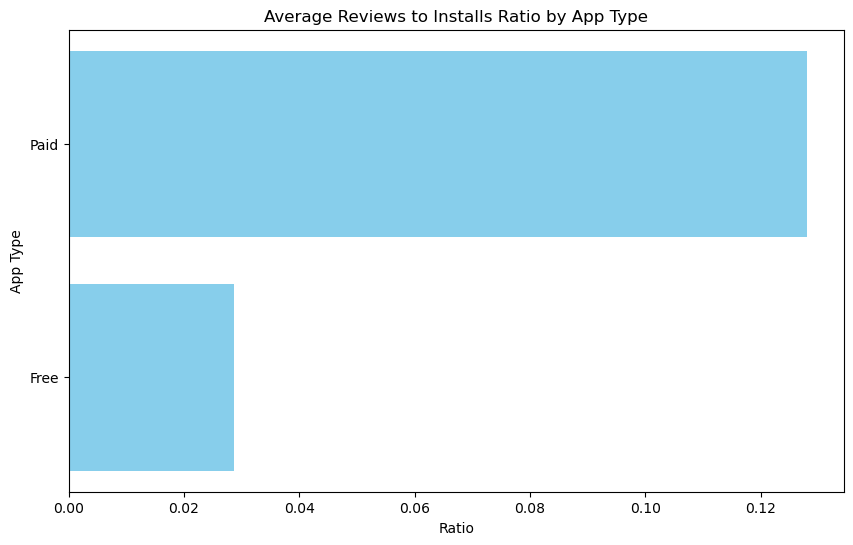

In [14]:
import matplotlib.pyplot as plt

app_types = ['Paid', 'Free']
ratios = [0.128004, 0.028678]

plt.figure(figsize=(10, 6))
plt.barh(app_types, ratios, color=['skyblue'])
plt.xlabel('Ratio')
plt.ylabel('App Type')
plt.title('Average Reviews to Installs Ratio by App Type')
plt.gca().invert_yaxis()  # Invert y-axis to have 'Paid' on top
plt.show()


Categories Sorted by Average Install Count:
COMMUNICATION: 84359886.95
SOCIAL: 47694467.46
VIDEO_PLAYERS: 35554301.26
PRODUCTIVITY: 33434177.76
GAME: 30669601.76
PHOTOGRAPHY: 30114172.10
TRAVEL_AND_LOCAL: 26623593.59
NEWS_AND_MAGAZINES: 26488755.34
ENTERTAINMENT: 19256107.38
TOOLS: 13585731.81
SHOPPING: 12491726.10
BOOKS_AND_REFERENCE: 8318050.11
PERSONALIZATION: 5932384.65
EDUCATION: 5586230.77
MAPS_AND_NAVIGATION: 5286729.12
FAMILY: 5201959.18
WEATHER: 5196347.80
HEALTH_AND_FITNESS: 4642441.38
SPORTS: 4560350.26
FINANCE: 2395215.12
BUSINESS: 2178075.79
FOOD_AND_DRINK: 2156683.08
HOUSE_AND_HOME: 1917187.06
ART_AND_DESIGN: 1912893.85
LIFESTYLE: 1407443.82
DATING: 1129533.36
COMICS: 934769.17
LIBRARIES_AND_DEMO: 741128.35
AUTO_AND_VEHICLES: 625061.31
PARENTING: 525351.83
BEAUTY: 513151.89
EVENTS: 249580.64
MEDICAL: 115026.86
1.9: -1.00


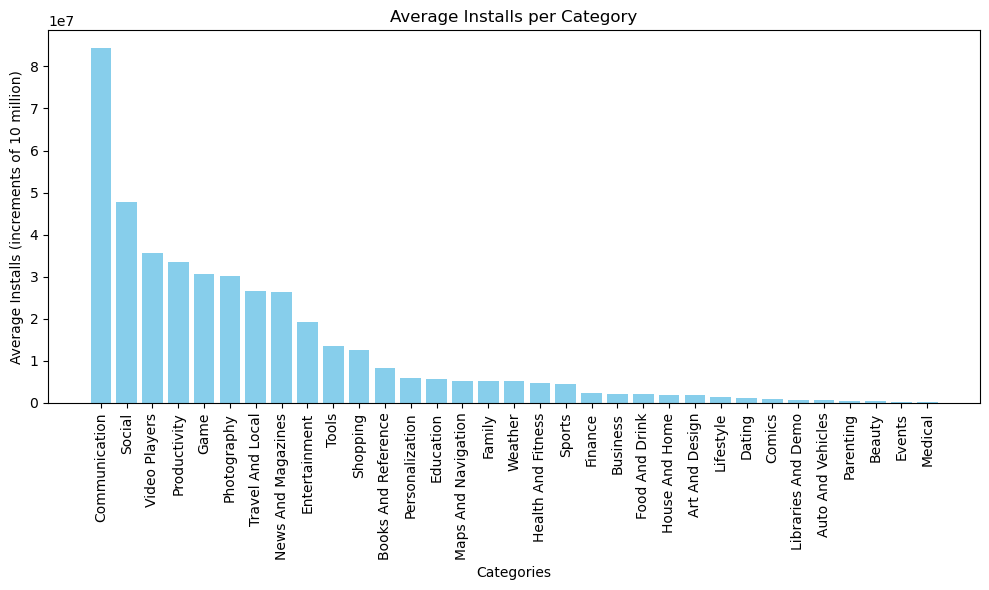

In [15]:
class MostPopularCategoriesReport:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def mapper(self, row):
        category = row[1]['Category']
        app = row[1]['App']
        reviews_str = row[1]['Reviews']
        reviews = int(float(reviews_str.replace('M', '')) * 1000000) if 'M' in reviews_str else int(reviews_str)
        
        installs_str = row[1]['Installs']
        installs_str = installs_str.replace('+', '').replace(',', '')
        installs = int(installs_str) if installs_str.isdigit() else -1
        
        return category, app, reviews, installs

    def reducer(self, acc, app_data):
        category, app, reviews, installs = app_data
        acc[category]['Reviews'] += reviews
        acc[category]['Installs'] += installs
        acc[category]['Count'] += 1
        return acc

    def preprocess_data(self):
        self.df.dropna(subset=['Reviews', 'Installs', 'Category'], inplace=True)

    def run_report(self):
        self.preprocess_data()
        mapped = map(self.mapper, self.df.iterrows())
        reduced = reduce(self.reducer, mapped, defaultdict(lambda: {'Reviews': 0, 'Installs': 0, 'Count': 0}))
        ratios = map(self.calculate_review_install_ratio, reduced.items())

        ratios = filter(lambda x: x[0] != '1.9', ratios)
        
        sorted_ratios = sorted(ratios, key=lambda x: x[1], reverse=True)
        sorted_categories_by_avg_installs = [(category, data['Installs'] / data['Count']) for category, data in reduced.items()]
        sorted_categories_by_avg_installs.sort(key=lambda x: x[1], reverse=True)
        
        return sorted_categories_by_avg_installs

    def calculate_review_install_ratio(self, category_data):
        category, data = category_data
        total_reviews = data['Reviews']
        total_installs = data['Installs']
        ratio = total_reviews / total_installs
        return category, ratio

    def plot_bar_chart(self, data):
        data = [(category, avg_installs) for category, avg_installs in data if category != '1.9']

        categories = [item[0].replace('_', ' ').title() for item in data]
        avg_installs = [item[1] for item in data]

        plt.figure(figsize=(10, 6))
        plt.bar(categories, avg_installs, color='skyblue')
        plt.xlabel('Categories')
        plt.ylabel('Average Installs (increments of 10 million)')
        plt.title('Average Installs per Category')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    report = MostPopularCategoriesReport('googleplaystore.csv')
    print("\nCategories Sorted by Average Install Count:")
    sorted_categories_with_avg_installs = report.run_report()
    for category, avg_installs in sorted_categories_with_avg_installs:
        print(f"{category}: {avg_installs:.2f}")
    
    report.plot_bar_chart(sorted_categories_with_avg_installs)


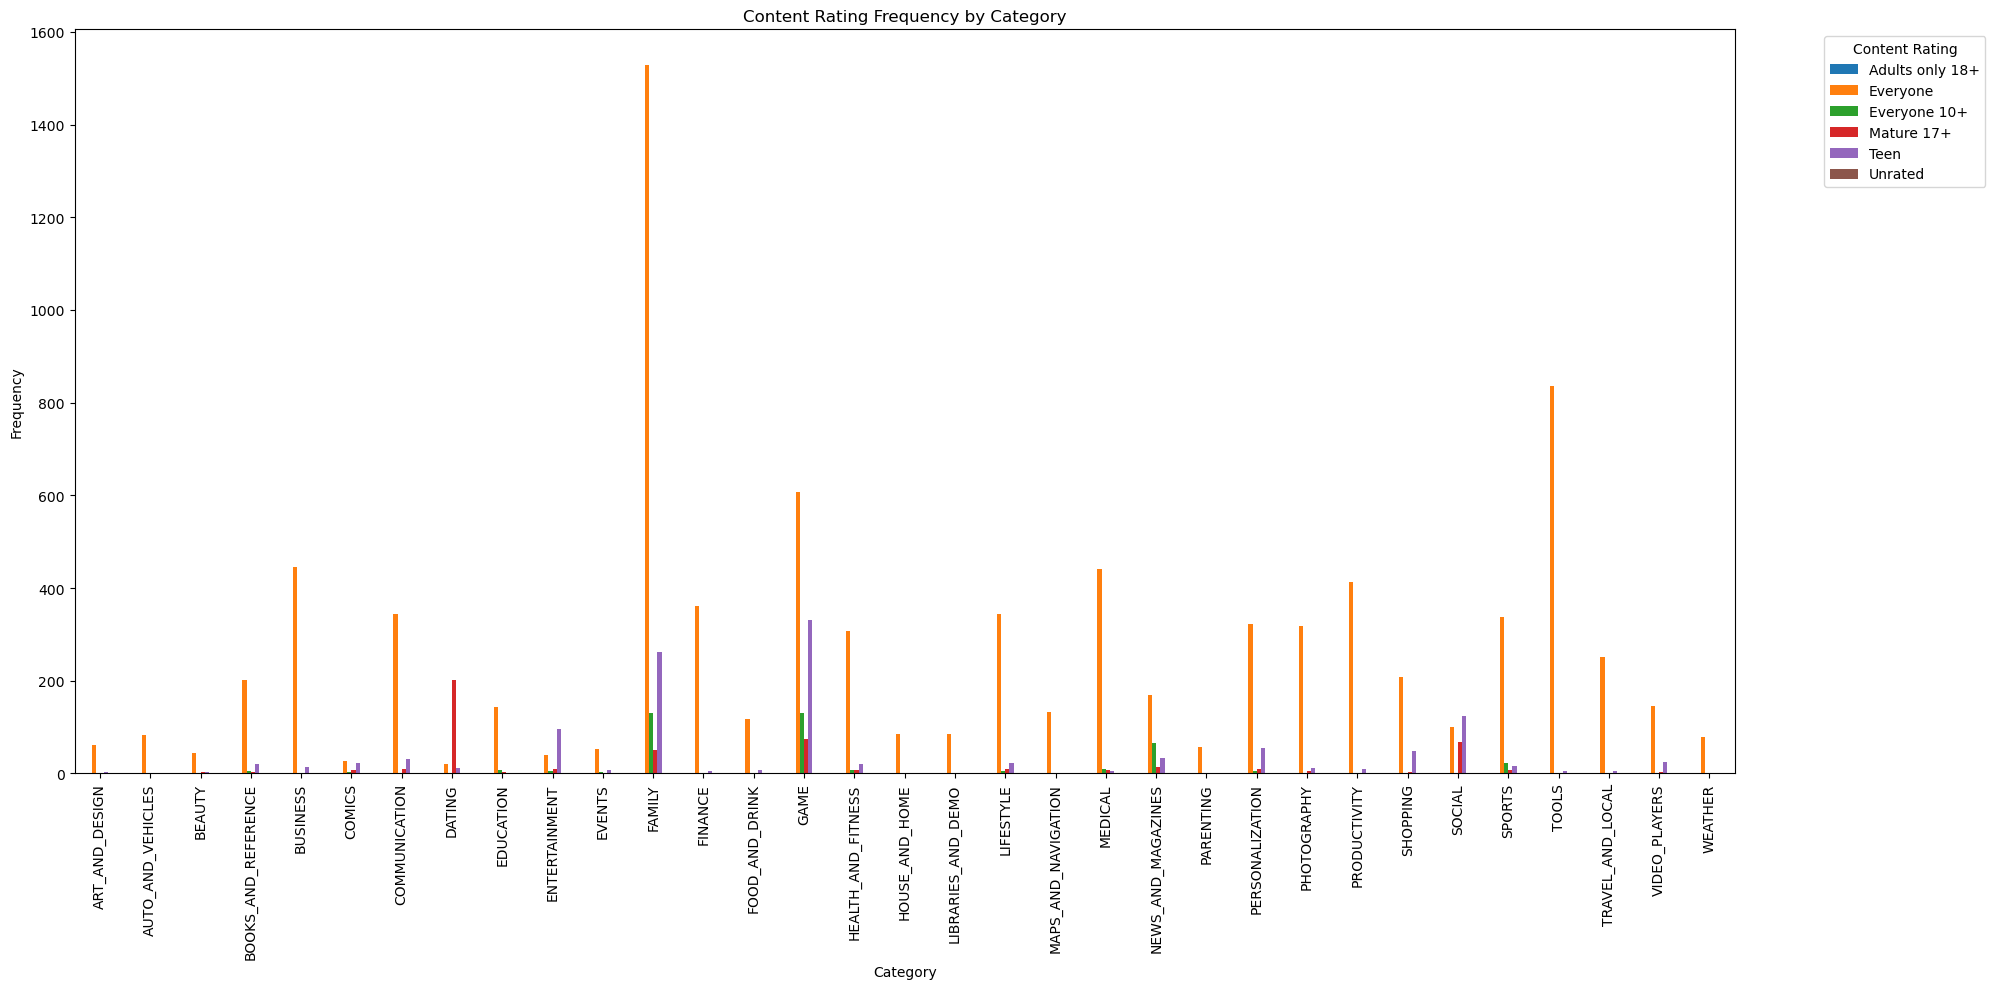

In [16]:
class ContentRatingFrequencyByCategory:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def plot_content_rating_frequency(self):
        category_content_rating_counts = self.df.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)
        
        fig, ax = plt.subplots(figsize=(20, 10))
        category_content_rating_counts.plot(kind='bar', ax=ax)
        
        ax.set_xlabel('Category')
        ax.set_ylabel('Frequency')
        ax.set_title('Content Rating Frequency by Category')
        ax.legend(title='Content Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=90)
        
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    report = ContentRatingFrequencyByCategory('googleplaystore.csv')
    report.plot_content_rating_frequency()